In [4]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import Column,String,Integer,create_engine,DECIMAL
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
base = declarative_base()

C:\Users\maha_\AppData\Local\Temp\ipykernel_29620\1487244358.py:7: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  base = declarative_base()


In [2]:
engine = create_engine(f'sqlite:///sunshine.sqlite')
connection = engine.connect()
session = Session(bind=engine)

In [3]:
class Sunshine(base):
    __tablename__ = 'sunshine'
    id = Column(Integer,primary_key=True)
    Country = Column(String)
    City = Column(String)
    Jan = Column(DECIMAL)
    Apr = Column(DECIMAL)
    Jul = Column(DECIMAL)
    Oct = Column(DECIMAL)
    Year = Column(DECIMAL)

In [5]:
#Read the data from sqlite database.
df = pd.read_sql('SELECT * FROM sunshine',connection)
df.head()

,id,Country,City,Jan,Apr,Jul,Oct,Year
0,0,Afghanistan,Kabul,177.2,232.5,356.8,282.6,3175.1
1,1,Albania,Tirana,124.0,191.0,354.0,218.0,2544.0
2,2,Algeria,Algiers,149.0,258.0,350.0,229.0,2847.0
3,3,Algeria,Tamanrasset,297.6,327.0,356.5,310.0,3686.0
4,4,Angola,Luanda,219.0,199.0,175.0,164.0,2341.0


In [6]:
# Find the total number of observed cities in Canada.
df_Canada = df.loc[df['Country']=='Canada']
nb_canada_observed = len(df_Canada)
print(f'The total cities obsersed in Canada is {nb_canada_observed}')

The total cities obsersed in Canada is 9


In [8]:
#Find the number of cities whose yearly sunshine equals or exceeds 3700 hours.
df_cicties_tearly_exceed_3700 = df.loc[df['Year']>=3700]
nb_cicties_exceed_3700 = len(df_cicties_tearly_exceed_3700)
print(f'The number of cities that exceed 3700 yearly consumption is {nb_cicties_exceed_3700}')

The number of cities that exceed 3700 yearly consumption is 11


In [10]:
#Print the city name, country, and yearly sunny hours of all cities whose yearly sunshine equals or exceeds 3700 hours.
df_cicties_tearly_exceed_3700[['Country','City','Year']].head()

,Country,City,Year
67,Chile,Calama,3926.2
107,Egypt,Dakhla Oasis,3943.4
109,Egypt,Marsa Alam,3958.0
212,Namibia,Keetmanshoop,3870.0
273,South Africa,Upington,3731.8


In [11]:
#Find the number of cities whose January sunshine equals or exceeds 300 hours.
cities_in_Jan_exceed_300 = df.loc[df['Jan']>=300]
nb_cities_jan_exceed_300 = len(cities_in_Jan_exceed_300)
print(f'The total number of cities where the consuption exceeds 300 in Jan is {nb_cities_jan_exceed_300}')

The total number of cities where the consuption exceeds 300 in Jan is 19


In [12]:
#Print the city name, country, January sunny hours, and yearly sunny hours of all cities that have 300 or greater hours of sunshine in January.
cities_in_Jan_exceed_300[['Country','City','Year']].head()

,Country,City,Year
12,Australia,Adelaide,2765.4
13,Australia,Alice Springs,3499.1
19,Australia,Perth,3229.5
64,Chad,Abéché,3500.9
66,Chile,Antofagasta,3077.1


In [13]:
#Find the number of cities in the Australia whose yearly hours of sunshine are 2500 or fewer.
australia_with_consumption_less_2500 = df.loc[(df['Country']=='Australia')&df['Year']<=2500]
nb_australia_cities_less_2500 = len(australia_with_consumption_less_2500)
print(f'The nb of Australian cities that have a consumption less than 2500 is {nb_australia_cities_less_2500}')


The nb of Australian cities that have a consumption less than 2500 is 384


In [14]:
#Print the city name and yearly sunny hours of cities in the Australia that receive 2500 or fewer hours of sunshine per year.
australia_with_consumption_less_2500[['City','Year']].head()

,City,Year
0,Kabul,3175.1
1,Tirana,2544.0
2,Algiers,2847.0
3,Tamanrasset,3686.0
4,Luanda,2341.0


In [18]:
#Calculate the Avg yearly consumption for each Country
country_df = df.groupby('Country')['Year'].mean().reset_index()
country_df = country_df.set_index('Country').sort_values('Year')
country_df

,Year
Country,
Faroe Islands,840.000000
Iceland,1326.000000
Norway,1373.333333
Saint Pierreand Miquelon,1427.300000
Ireland,1453.000000
...,...
Oman,3493.300000
United ArabEmirates,3508.700000
Sudan,3559.550000


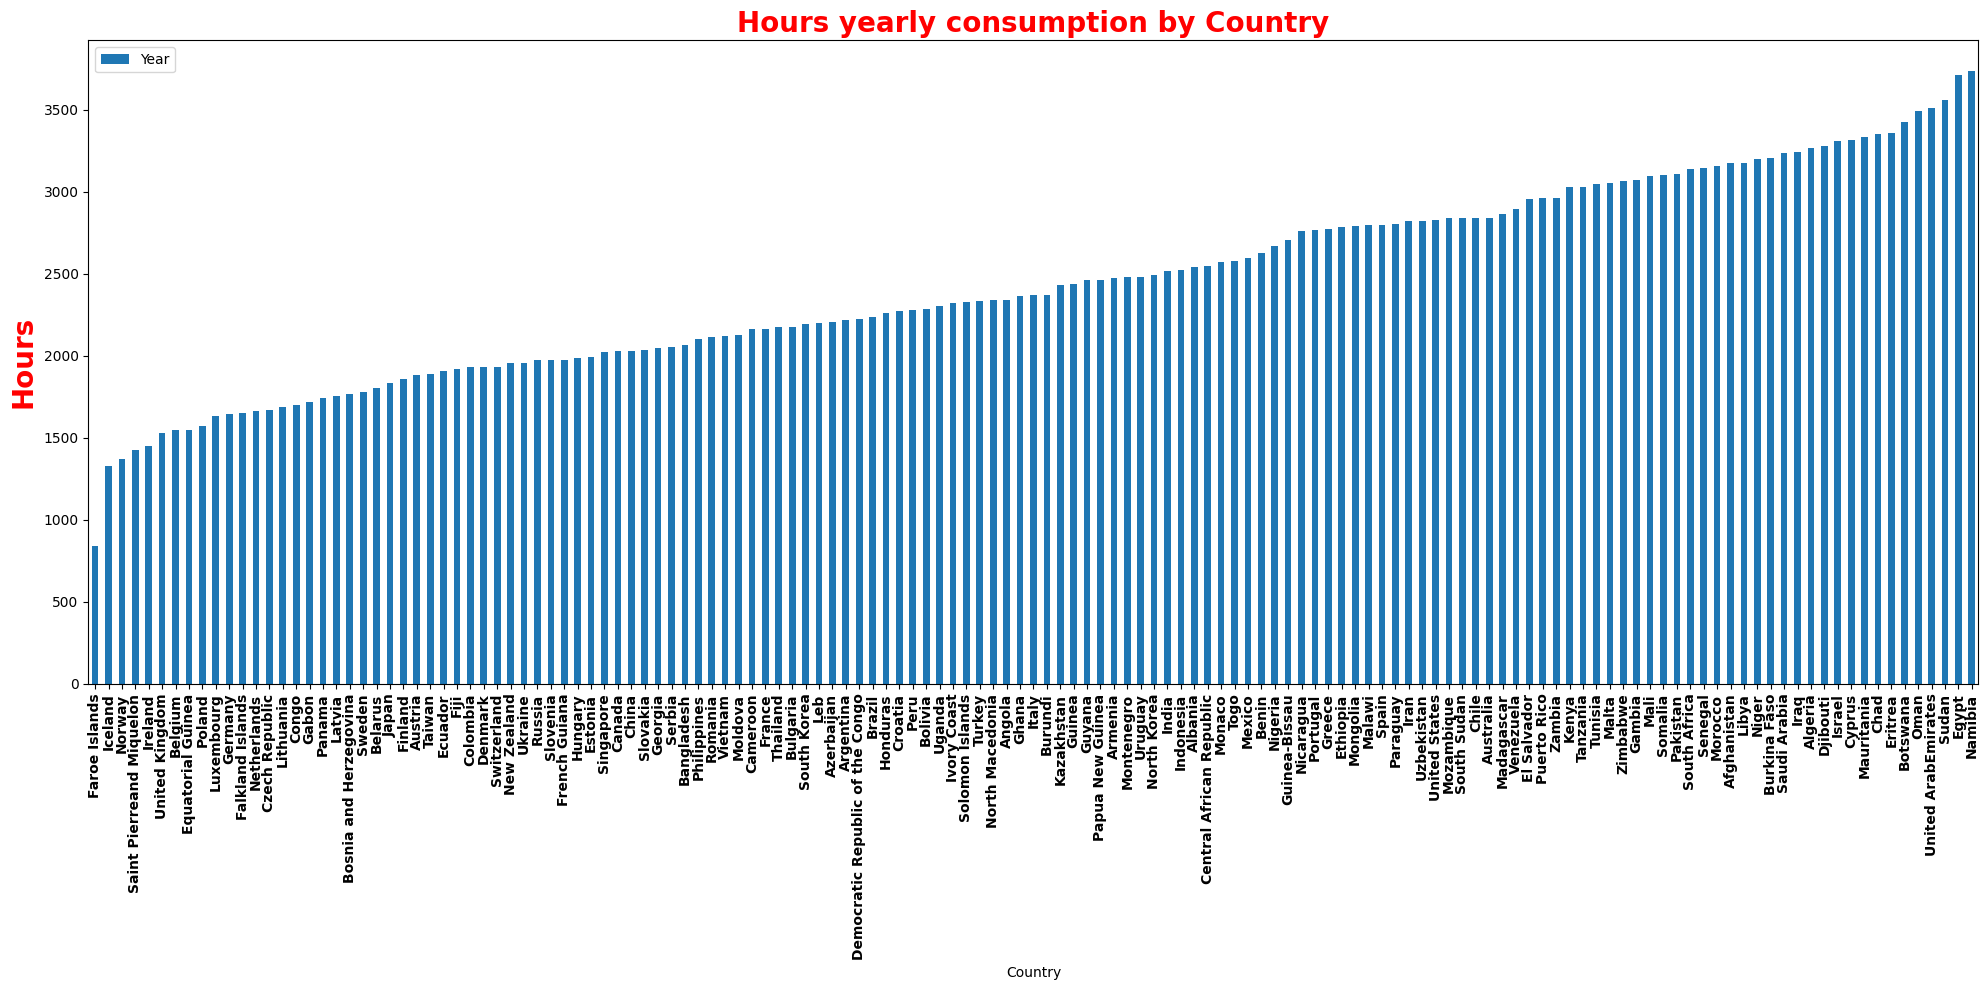

In [25]:
# Show the result in a bar graph
bar_graph = country_df.plot(kind='bar',figsize=(20,10))
plt.title('Hours yearly consumption by Country',fontsize=20,fontweight='bold',color='r')
plt.xticks(fontweight='bold')
plt.ylabel('Hours',fontweight='bold',fontsize=20,color='r')
plt.tight_layout()
plt.show()